In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')   #importing required dependencies
import copy 

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

In [2]:
# loading datasets

movies_metadata_cleaned= pd.read_csv('movies_metadata_cleaned.csv')   

credits_cleaned= pd.read_csv('credits_cleaned.csv')

links_cleaned= pd.read_csv('links_cleaned.csv')

keywords_cleaned= pd.read_csv('keywords_cleaned.csv')

links_small_cleaned= pd.read_csv('links_small_cleaned.csv')

ratings_small=pd.read_csv('ratings_small.csv')


In [3]:
#copying original data
movies_metadata_cleaned_original = copy.copy(movies_metadata_cleaned)
credits_cleaned_original = copy.copy(credits_cleaned)
keywords_cleaned_original = copy.copy(keywords_cleaned)


# renaming column 'movieId' to id

In [4]:
# renaming column 'moviID' to id
links_cleaned.rename(columns={'movieId': 'id'}, inplace=True)
links_small_cleaned.rename(columns={'movieId': 'id'}, inplace=True)
ratings_small.rename(columns={'movieId': 'id'}, inplace=True)

## 1.movies_metadata_cleaned

In [5]:
movies_metadata_cleaned.tail(3)

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
44032,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,False,3.8,6.0
44033,False,0,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,False,0.0,0.0
44034,False,0,[],461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,0.163015,/s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Queerama,False,0.0,0.0


In [6]:
movies_metadata_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44035 entries, 0 to 44034
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 44035 non-null  bool   
 1   budget                44035 non-null  int64  
 2   genres                44035 non-null  object 
 3   id                    44035 non-null  int64  
 4   imdb_id               44035 non-null  object 
 5   original_language     44035 non-null  object 
 6   original_title        44035 non-null  object 
 7   overview              44035 non-null  object 
 8   popularity            44035 non-null  float64
 9   poster_path           44035 non-null  object 
 10  production_companies  44035 non-null  object 
 11  production_countries  44035 non-null  object 
 12  release_date          44035 non-null  object 
 13  revenue               44035 non-null  float64
 14  runtime               44035 non-null  float64
 15  spoken_languages   

In [7]:
movies_metadata_cleaned.shape

(44035, 21)

In [8]:
# checking for specail characters in the column
special_characters = ['[]']  

columns_with_special_characters = {}

for column in movies_metadata_cleaned.columns:
    li = []
    for index, row in movies_metadata_cleaned.iterrows():
        if isinstance(row[column], str) and any(characters in row[column] for characters in special_characters):
            li.append(row[column])
    if li:
        columns_with_special_characters[column] = li

for column, values in columns_with_special_characters.items():
    print(f"Column: {column}")
    print(values[0:10])
    print(f"Total: {len(values)}")
    print()


Column: genres
['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]']
Total: 1966

Column: production_companies
['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]']
Total: 10946

Column: production_countries
['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]']
Total: 5721

Column: spoken_languages
['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]']
Total: 3321



### there are special character '[]' in the columns ['genres','production_companies','product_countries','spoken language']

In [9]:
# removing the rows containing specail characters
for column in ['genres', 'production_companies', 'production_countries', 'spoken_languages']:
    rows_to_drop = movies_metadata_cleaned[movies_metadata_cleaned[column].isin(special_characters)]
    movies_metadata_cleaned.drop(rows_to_drop.index, inplace=True)

In [10]:
print(movies_metadata_cleaned.shape)

(31706, 21)


# 2.credits_cleaned

In [11]:
credits_cleaned.tail(3)

,cast,crew,id
45436,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45437,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506
45438,[],"[{'credit_id': '593e676c92514105b702e68e', 'de...",461257


In [12]:
credits_cleaned.shape

(45439, 3)

In [13]:
credits_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45439 entries, 0 to 45438
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45439 non-null  object
 1   crew    45439 non-null  object
 2   id      45439 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [14]:
# checking for specail characters in the column
special_characters = ['[]'] 

columns_with_special_characters = {}

for column in credits_cleaned.columns:
    li = []
    for index, row in credits_cleaned.iterrows():
        if isinstance(row[column], str) and any(characters in row[column] for characters in special_characters):
            li.append(row[column])
    if li:
        columns_with_special_characters[column] = li

for column, values in columns_with_special_characters.items():
    print(f"Column: {column}")
    print(values[0:10])
    print(f"Total: {len(values)}")
    print()


Column: cast
['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]']
Total: 2414

Column: crew
['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]']
Total: 771



### there are special character '[]' in the columns ['cast','crew']

In [15]:
#removing the rows conatining specail characters '[]'
for column in ['cast','crew']:
    rows_to_drop = credits_cleaned[credits_cleaned[column].isin(special_characters)]
    credits_cleaned.drop(rows_to_drop.index, inplace=True)

In [16]:
credits_cleaned['cast'][0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

# 3.links_cleaned

In [17]:
links_cleaned.head(3)

,id,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [18]:
links_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45624 entries, 0 to 45623
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      45624 non-null  int64  
 1   imdbId  45624 non-null  int64  
 2   tmdbId  45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [19]:
print(links_cleaned.shape)

(45624, 3)


# 4.keywords_cleaned

In [20]:
keywords_cleaned.head(3)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [21]:
keywords_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45432 non-null  int64 
 1   keywords  45432 non-null  object
dtypes: int64(1), object(1)
memory usage: 710.0+ KB


In [22]:
# checking for specail characters in the column
special_characters = ['[]']  

keywords_with_special_characters = []

for index, row in keywords_cleaned.iterrows():
    if isinstance(row['keywords'], str) and any(characters in row['keywords'] for characters in special_characters):
        keywords_with_special_characters.append(row['keywords'])

print("Column: keywords")
print(keywords_with_special_characters[0:10])
print(f"Total: {len(keywords_with_special_characters)}")


Column: keywords
['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]']
Total: 14340


In [23]:
#removing the rows conatining specail characters '[]'
for column in ['keywords']:
    rows_to_drop = keywords_cleaned[keywords_cleaned[column].isin(special_characters)]
    keywords_cleaned.drop(rows_to_drop.index, inplace=True)

In [24]:
print(keywords_cleaned.shape)

(31092, 2)


# 5.links_small_cleaned

In [25]:
links_small_cleaned.head(3)

,Unnamed: 0,id,imdbId,tmdbId
0,0,1,114709,862.0
1,1,2,113497,8844.0
2,2,3,113228,15602.0


In [26]:
links_small_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9112 entries, 0 to 9111
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9112 non-null   int64  
 1   id          9112 non-null   int64  
 2   imdbId      9112 non-null   int64  
 3   tmdbId      9112 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 284.9 KB


# 6. ratings_small.head

In [27]:
ratings_small.head(3)

,userId,id,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


In [28]:
ratings_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   id         100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [29]:
ratings_small['timestamp'] = pd.to_datetime(ratings_small['timestamp'], unit='s')
ratings_small['year'] = ratings_small['timestamp'].dt.year

In [30]:
ratings_small.head(3)

,userId,id,rating,timestamp,year
0,1,31,2.5,2009-12-14 02:52:24,2009
1,1,1029,3.0,2009-12-14 02:52:59,2009
2,1,1061,3.0,2009-12-14 02:53:02,2009


In [31]:
ratings_small['year'].value_counts()

2000    13869
2006     7493
2005     7161
2015     6610
1996     6239
2016     6225
1999     5901
2001     4658
2004     4658
2003     4462
2011     4450
2002     3938
2012     3849
2008     3676
2009     3434
1997     3294
2010     2518
2014     2224
2013     1969
1998     1825
2007     1548
1995        3
Name: year, dtype: int64

In [32]:
print('total users who gave the rating :',ratings_small['userId'].nunique())

total users who gave the rating : 671


In [33]:
ratings_small['userId'].value_counts()

547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: userId, Length: 671, dtype: int64

In [34]:
ratings_small.shape

(100004, 5)

## shapes of the files

In [35]:
print('movies_metadata_cleaned shape :', movies_metadata_cleaned_original.shape)
print('credits_cleaned shape :',   credits_cleaned_original.shape)
print('keywords_cleaned shape :', keywords_cleaned_original.shape)


movies_metadata_cleaned shape : (44035, 21)
credits_cleaned shape : (45439, 3)
keywords_cleaned shape : (45432, 2)


In [36]:
print('movies_metadata_cleaned shape :', movies_metadata_cleaned.shape)
print('credits_cleaned shape :',   credits_cleaned.shape)
print('links_cleaned shape :', links_cleaned.shape)
print('keywords_cleaned shape :', keywords_cleaned.shape)
print('links_small_cleaned shape :', links_small_cleaned.shape)
print('ratings_small shape :',ratings_small.shape)

movies_metadata_cleaned shape : (31706, 21)
credits_cleaned shape : (42675, 3)
links_cleaned shape : (45624, 3)
keywords_cleaned shape : (31092, 2)
links_small_cleaned shape : (9112, 4)
ratings_small shape : (100004, 5)


# Exploratory Data Analysis

# Univariate Analysis

In [37]:
#value counts of adult feature
adult_count= movies_metadata_cleaned_original['adult'].value_counts()
print('Total Non-adult movies :', adult_count[0])
print('Total Adult movies :',adult_count[1])

Total Non-adult movies : 44027
Total Adult movies : 8


In [38]:
#total languages
language_counts =movies_metadata_cleaned_original['original_language'].nunique()
print('total laguages :',language_counts)

total laguages : 89


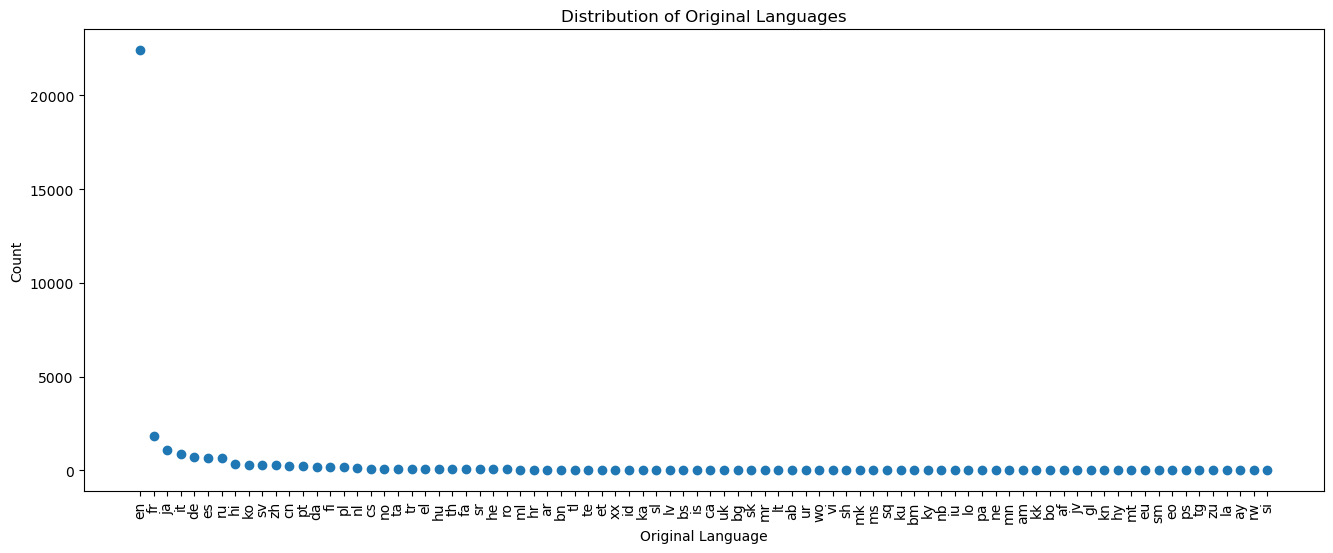

In [39]:
# Count the occurrences of each language in the 'original_language' column
language_counts = movies_metadata_cleaned['original_language'].value_counts()

# Create a bar plot
plt.figure(figsize=(16, 6))
plt.scatter(language_counts.index, language_counts.values)
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.title('Distribution of Original Languages')
plt.xticks(rotation=90)
plt.show()


In [40]:
#value counts of film status
status_counts= movies_metadata_cleaned['status'].value_counts()
status_counts

Released           31529
Rumored               97
Post Production       60
In Production         12
Planned                8
Name: status, dtype: int64

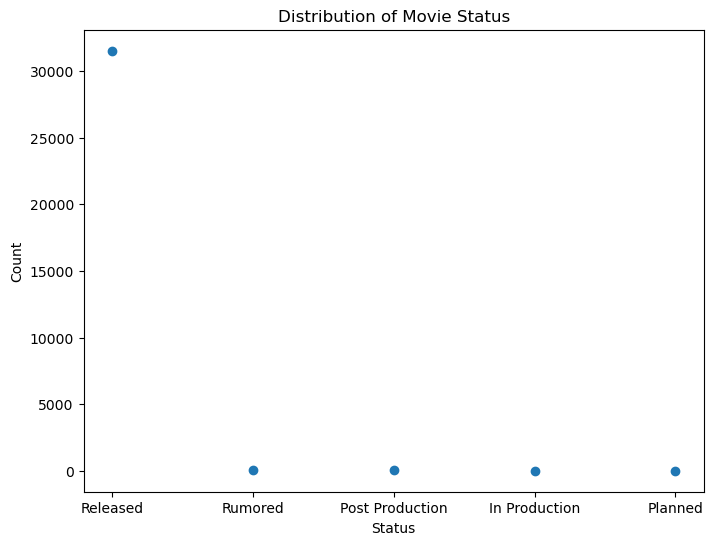

In [41]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(status_counts.index, status_counts.values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Movie Status')
plt.show()

In [42]:
#finding out the maximum budget movie
max_budget_row= movies_metadata_cleaned[movies_metadata_cleaned['budget'] == movies_metadata_cleaned['budget'].max()]
max_budget_row[['title', 'budget']]

,title,budget
16976,Pirates of the Caribbean: On Stranger Tides,380000000


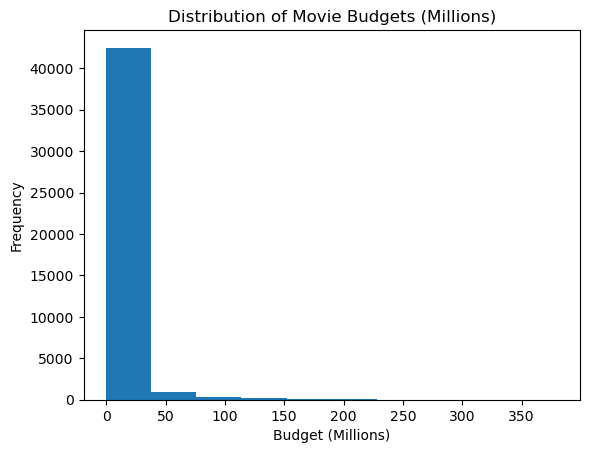

In [43]:
# Plotting the histogram
plt.hist(movies_metadata_cleaned_original['budget']/ 1e6)
plt.xlabel('Budget (Millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Budgets (Millions)')
plt.show()

## more than 40,000 films are in the budget of 1 to 40 million $

In [44]:
# Find the most popular movie
popular_movie = movies_metadata_cleaned[movies_metadata_cleaned['popularity'] == movies_metadata_cleaned['popularity'].max()]
popular_movie[['title', 'popularity', 'budget', 'revenue', 'vote_average', 'vote_count']]


,title,popularity,budget,revenue,vote_average,vote_count
30119,Minions,547.488298,74000000,1.156731e+09,6.4,4729.0


In [45]:
#finding out the popular movies as per the vote_count feature
pop_movie = movies_metadata_cleaned[movies_metadata_cleaned['vote_count']==movies_metadata_cleaned['vote_count'].max()]
pop_movie[['title','vote_count']]

,title,vote_count
15358,Inception,14075.0


In [46]:
#longest_movie

longest_movie_row = movies_metadata_cleaned_original[movies_metadata_cleaned_original['runtime'] == movies_metadata_cleaned_original['runtime'].max()]
longest_movie_title = longest_movie_row['title'].values[0]
language = longest_movie_row['original_language'].values[0]

print("Longest movie:")
print("Title:", longest_movie_title)
print('language :', language)
print("Runtime (minutes):",movies_metadata_cleaned_original['runtime'].max())

Longest movie:
Title: Centennial
language : en
Runtime (minutes): 1256.0


In [47]:
movie_year= movies_metadata_cleaned_original.merge(ratings_small,on ='id')

In [48]:
movie_counts_year =movie_year['year'].value_counts()

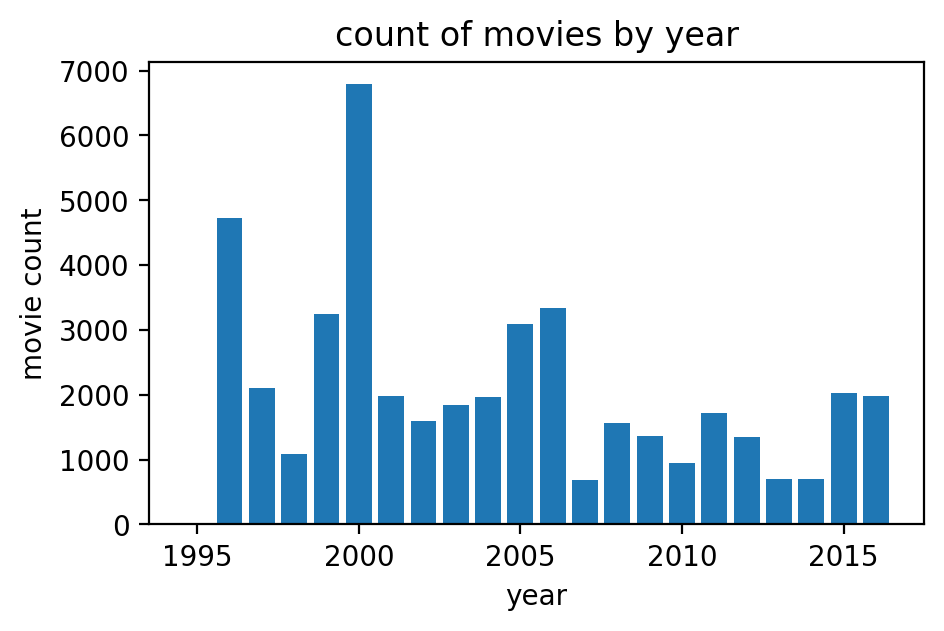

In [49]:
plt.figure(figsize=(5,3),dpi=200)
#barplot
plt.bar(movie_counts_year.index,movie_counts_year.values)
plt.xlabel('year')
plt.ylabel('movie count')
plt.title('count of movies by year')
plt.show()

## year 2000 is the year in which most of the films were made (nearly 7000)

# Bivariate Analysis

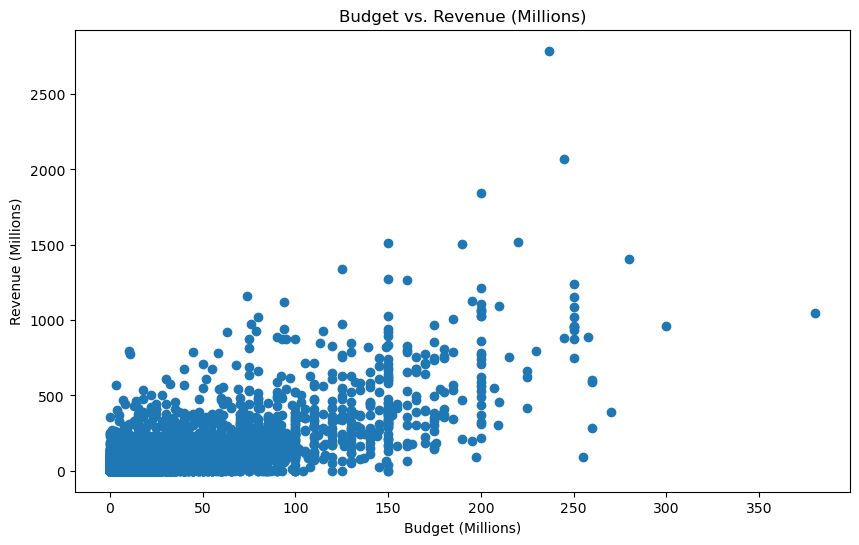

In [50]:
# Increase the width of the figure
plt.figure(figsize=(10, 6))  # Adjust the width as desired

# Plotting the scatter plot
plt.scatter( movies_metadata_cleaned_original['budget']/ 1e6,  movies_metadata_cleaned_original['revenue']/1e6)
plt.xlabel('Budget (Millions)')
plt.ylabel('Revenue (Millions)')
plt.title('Budget vs. Revenue (Millions)')
plt.show()

### The Relationship between Budget and Revenue is almost linear

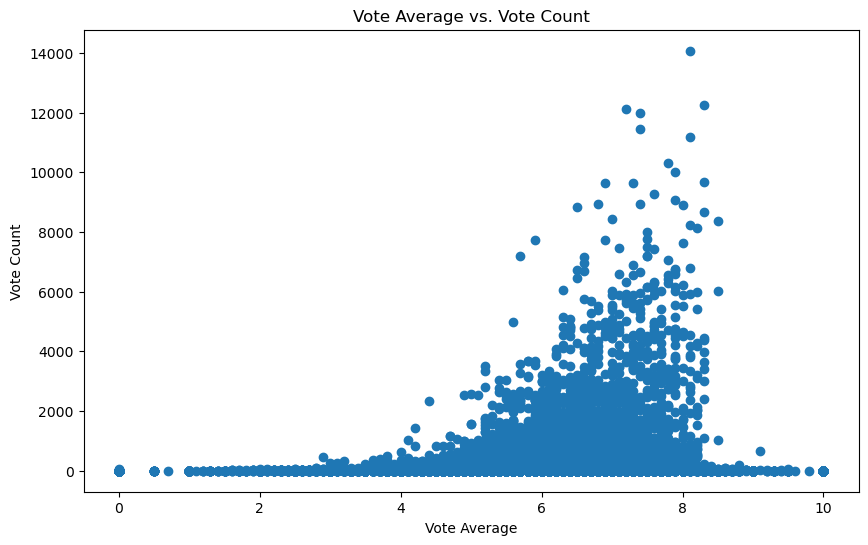

In [51]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter( movies_metadata_cleaned_original['vote_average'],  movies_metadata_cleaned_original['vote_count'])
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.title('Vote Average vs. Vote Count')
plt.show()

In [52]:
# Extract the genres from the "genres" column
movies_metadata_cleaned['genres_list'] = movies_metadata_cleaned['genres'].apply(eval).apply(lambda x: [genre['name'] for genre in x])

In [53]:
# Count the number of movies in each genre
genre_counts = movies_metadata_cleaned['genres_list'].explode().unique()
genre_counts

array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Science Fiction', 'Mystery', 'War', 'Music', 'Documentary',
       'Foreign', 'Western', 'TV Movie'], dtype=object)

In [54]:
def get_genres_movies(genre):
    genre_movies = content_df_genre[content_df_genre['genres_list'].str.contains(genre, case=False)]
    genre_movies = genre_movies.sort_values('score', ascending=False)
    popular_movies = genre_movies.head(5)['original_title_x'].tolist()

In [55]:
movies_metadata_cleaned_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44035 entries, 0 to 44034
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 44035 non-null  bool   
 1   budget                44035 non-null  int64  
 2   genres                44035 non-null  object 
 3   id                    44035 non-null  int64  
 4   imdb_id               44035 non-null  object 
 5   original_language     44035 non-null  object 
 6   original_title        44035 non-null  object 
 7   overview              44035 non-null  object 
 8   popularity            44035 non-null  float64
 9   poster_path           44035 non-null  object 
 10  production_companies  44035 non-null  object 
 11  production_countries  44035 non-null  object 
 12  release_date          44035 non-null  object 
 13  revenue               44035 non-null  float64
 14  runtime               44035 non-null  float64
 15  spoken_languages   

In [56]:
# Extracting the countries from the "prodcution countries" column
movies_metadata_cleaned['produced_countries'] = movies_metadata_cleaned['production_countries'].apply(eval).apply(lambda x: [genre['name'] for genre in x])

In [57]:
# Count the number of movies in each genre
countries_counts = movies_metadata_cleaned['produced_countries'].explode().value_counts()
countries_counts[0:10]

United States of America    18073
United Kingdom               3481
France                       3230
Germany                      1803
Italy                        1617
Canada                       1417
Japan                        1328
Spain                         754
Russia                        742
India                         578
Name: produced_countries, dtype: int64

### These are the top 10 producing countries

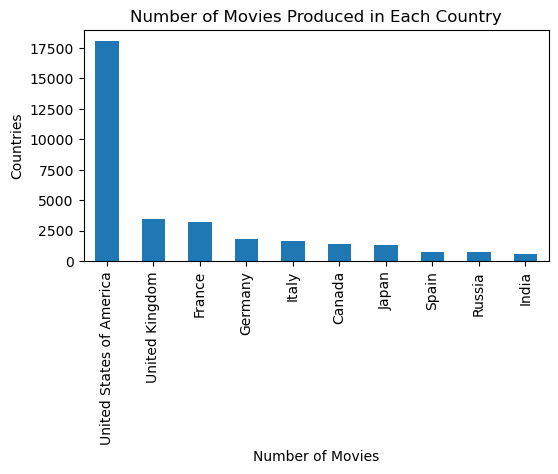

In [58]:
# Plot 
plt.figure(figsize=(6, 3))  # Set the figure size
countries_counts[0:10].plot(kind='bar')
plt.xlabel('Number of Movies')  # Set the x-label
plt.ylabel('Countries')  # Set the y-label
plt.title('Number of Movies Produced in Each Country')  # Set the title
plt.show()  # Show the plot


# 1.Popularity Based Recommender system

#  Recommendation System using weighted average of movie average rating

 ### W =Rv+Cm/v+m

### W=weighted rating
### R = rating(0-5)
### v = number of votes for the movie (vote_counts)
### m = minimu votes
### c = MEAN votes 

In [59]:
ratings_small.head(4)
#here only 1 user has given multiple ratings.so we are going to aggregate the ratings

,userId,id,rating,timestamp,year
0,1,31,2.5,2009-12-14 02:52:24,2009
1,1,1029,3.0,2009-12-14 02:52:59,2009
2,1,1061,3.0,2009-12-14 02:53:02,2009
3,1,1129,2.0,2009-12-14 02:53:05,2009


In [60]:
# Aggregate ratings by movie
aggregated_ratings = ratings_small.groupby('id')['rating'].agg(['mean', 'count']).reset_index()
aggregated_ratings.columns = ['id', 'avg_rating', 'vote_count']
aggregated_ratings

,id,avg_rating,vote_count
0,1,3.872470,247
1,2,3.401869,107
2,3,3.161017,59
3,4,2.384615,13
4,5,3.267857,56
...,...,...,...
9061,161944,5.000000,1
9062,162376,4.500000,1
9063,162542,5.000000,1
9064,162672,3.000000,1


In [61]:
# merging movies_metadat_cleaned_original with aggregated_ratings
merge_1 = movies_metadata_cleaned_original.merge(aggregated_ratings, on='id')

In [62]:
merge_1.head(2)

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count_x,avg_rating,vote_count_y
0,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,False,7.7,1886.0,3.59375,16
1,False,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,GoldenEye,False,6.6,1194.0,1.50000,2


In [63]:
### avg_rating = average rating
### vote_count_x = total votes received
### vote_count_y =  userid given ratings

In [64]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 2804
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 2805 non-null   bool   
 1   budget                2805 non-null   int64  
 2   genres                2805 non-null   object 
 3   id                    2805 non-null   int64  
 4   imdb_id               2805 non-null   object 
 5   original_language     2805 non-null   object 
 6   original_title        2805 non-null   object 
 7   overview              2805 non-null   object 
 8   popularity            2805 non-null   float64
 9   poster_path           2805 non-null   object 
 10  production_companies  2805 non-null   object 
 11  production_countries  2805 non-null   object 
 12  release_date          2805 non-null   object 
 13  revenue               2805 non-null   float64
 14  runtime               2805 non-null   float64
 15  spoken_languages     

In [65]:
m = 100 
c = merge_1['vote_count_x'].mean()

In [66]:
# Calculate the weighted average (W)
merge_1['weighted_average(W)'] = (merge_1['avg_rating'] * merge_1['vote_count_x'] + c * m) / (merge_1['vote_count_x'] + m)

In [67]:
# Sort by weighted average in descending order
merge_1_sorted = merge_1.sort_values('weighted_average(W)', ascending=False)
merge_1_sorted[['id','title','vote_count_x','avg_rating','vote_average','vote_count_y','popularity','weighted_average(W)']]

,id,title,vote_count_x,avg_rating,vote_average,vote_count_y,popularity,weighted_average(W)
2750,109074,Day of the Reaper,0.0,4.000000,0.0,1,0.000080,431.946881
347,62394,The Education of Little Tree,0.0,1.333333,0.0,6,0.007123,431.946881
2258,41863,Sundome,0.0,3.750000,0.0,2,0.014339,431.946881
1953,2397,Fallout,0.0,3.500000,0.0,2,1.687428,431.946881
2778,111913,A2,0.0,3.000000,0.0,1,0.102332,431.946881
...,...,...,...,...,...,...,...,...
57,278,The Shawshank Redemption,8358.0,3.000000,8.5,5,51.645403,8.071493
492,603,The Matrix,9079.0,3.000000,7.9,1,33.366332,7.673133
567,550,Fight Club,9678.0,3.272727,8.3,11,63.869599,7.656795
1915,1726,Iron Man,8951.0,1.928571,7.4,7,22.073099,6.679630


In [68]:
# Sorted by popularity
merge_1_sorted = merge_1.sort_values('popularity', ascending=False)
merge_1_sorted[['id','title','vote_count_x','avg_rating','vote_average','vote_count_y','popularity','weighted_average(W)']]

,id,title,vote_count_x,avg_rating,vote_average,vote_count_y,popularity,weighted_average(W)
52,680,Pulp Fiction,8670.0,3.916667,8.3,6,140.950236,8.797285
1901,155,The Dark Knight,12269.0,3.055556,8.3,9,123.167259,6.523025
104,78,Blade Runner,3833.0,3.200000,7.9,10,96.272374,14.101268
567,550,Fight Club,9678.0,3.272727,8.3,11,63.869599,7.656795
57,278,The Shawshank Redemption,8358.0,3.000000,8.5,5,51.645403,8.071493
...,...,...,...,...,...,...,...,...
2251,99106,The Monster,1.0,2.500000,6.0,1,0.000151,427.694931
2172,40959,"Crosby, Stills & Nash: Long Time Comin'",0.0,1.750000,0.0,2,0.000088,431.946881
2750,109074,Day of the Reaper,0.0,4.000000,0.0,1,0.000080,431.946881
2767,58306,Devo: The Complete Truth About De-Evolution,0.0,3.166667,0.0,3,0.000004,431.946881


In [69]:
# minmax scaler
minmax = MinMaxScaler()
#normalizing popuplarity and weighted_average
merge_1['normalized_popularity']= minmax.fit_transform(merge_1[['popularity']])
merge_1['normalized_weighted_average']= minmax.fit_transform(merge_1[['weighted_average(W)']])
merge_1.head(2)

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,status,title,video,vote_average,vote_count_x,avg_rating,vote_count_y,weighted_average(W),normalized_popularity,normalized_weighted_average
0,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,...,Released,Heat,False,7.7,1886.0,3.59375,16,25.162387,0.127172,0.043814
1,False,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,...,Released,GoldenEye,False,6.6,1194.0,1.50000,2,34.764828,0.104193,0.066385


In [70]:
# giving importance 50/50 importance to popularity & weighted average
merge_1['score']= (merge_1['normalized_popularity']*0.50)+(merge_1['normalized_weighted_average']*0.50)

In [183]:
# Sorted by score
merge_1_sorted = merge_1.sort_values('score', ascending=False)
merge_1_sorted_popularity =merge_1_sorted[['id','title','vote_count_x','avg_rating','vote_average','vote_count_y','popularity','weighted_average(W)','score']]
merge_1_sorted_popularity.head(5)

,id,title,vote_count_x,avg_rating,vote_average,vote_count_y,popularity,weighted_average(W),score
1953,2397,Fallout,0.0,3.500000,0.0,2,1.687428,431.946881,0.505986
2331,121113,Toomorrow,0.0,1.000000,0.0,1,1.418274,431.946881,0.505031
177,2033,Infinity,0.0,3.041667,0.0,12,1.226688,431.946881,0.504351
2549,26599,Duel of Hearts,0.0,5.000000,0.0,1,1.213965,431.946881,0.504306
52,680,Pulp Fiction,8670.0,3.916667,8.3,6,140.950236,8.797285,0.502673


In [72]:
merge_1_sorted_popularity_dict = merge_1_sorted_popularity.to_dict()
merge_1_sorted_popularity_dict

{'id': {1953: 2397,
  2331: 121113,
  177: 2033,
  2549: 26599,
  52: 680,
  2522: 43419,
  2582: 27255,
  1822: 2701,
  1746: 3024,
  2667: 4979,
  2786: 64278,
  2696: 99846,
  1241: 62383,
  1883: 1488,
  2778: 111913,
  2097: 50641,
  2229: 40629,
  2570: 160718,
  2627: 107081,
  2630: 27875,
  2362: 3576,
  1998: 101362,
  2485: 8371,
  2258: 41863,
  2732: 64501,
  947: 72308,
  2105: 75341,
  2371: 128606,
  347: 62394,
  2294: 26251,
  2445: 49957,
  2511: 58301,
  1855: 90374,
  2720: 79163,
  2774: 130980,
  2187: 3966,
  764: 70282,
  2659: 4709,
  1557: 3118,
  2172: 40959,
  2750: 109074,
  2767: 58306,
  901: 5678,
  2324: 2180,
  2426: 129009,
  2782: 3210,
  2385: 130452,
  1719: 54910,
  2215: 3556,
  2537: 3405,
  2099: 55063,
  2773: 118900,
  2588: 27724,
  2433: 112460,
  2347: 4992,
  1932: 32666,
  2736: 4462,
  2301: 91325,
  2423: 4930,
  2581: 107406,
  284: 64900,
  2640: 134881,
  2647: 31770,
  2432: 93061,
  435: 84116,
  2344: 85788,
  2512: 102165,
  26

In [73]:
def extract_nearest_popular_movies(movie_name):
    # Filtering movies that contain the given movie name in their titles
    filtered_movies = merge_1[merge_1['title'].str.contains(movie_name, case=False)]
    
    if filtered_movies.empty:
        return "No movies found with that name. Please try a different movie."
    
    # Get the popularity score of the given movie
    popularity_score = filtered_movies.iloc[0]['popularity']
    
    # Calculate the absolute difference between the popularity scores of all movies and the given movie
    merge_1['popularity_difference'] = abs(merge_1['popularity'] - popularity_score)
    
    # Sort movies based on the popularity difference in ascending order
    sorted_movies = merge_1.sort_values('popularity_difference')
    
    # Exclude the exact movie from the recommendations
    sorted_movies = sorted_movies[sorted_movies['title'] != movie_name]
    
    # Get the top 5 nearest popular movies
    recommended_movies = sorted_movies.head(5)
    
    return recommended_movies['title']


In [74]:
#printing the nearest popular movies
extract_nearest_popular_movies('Infinity')

2643      The French Revolution
901              The Wrong Guys
1404        The Stolen Children
891               Hero at Large
547     The Very Thought of You
Name: title, dtype: object

# 2.Content Based Recommender System

In [75]:
#merging required files on 'id' column
merged_df = pd.merge(movies_metadata_cleaned, keywords_cleaned, on='id')
merged_df2= pd.merge(merged_df, credits_cleaned, on='id')
content_df =pd.merge(merged_df2,links_cleaned, on='id')
content_df[0:2]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,video,vote_average,vote_count,genres_list,produced_countries,keywords,cast,crew,imdbId,tmdbId
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,False,7.7,5415.0,"[Animation, Comedy, Family]",[United States of America],"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",116985,88224.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,False,6.9,2413.0,"[Adventure, Fantasy, Family]",[United States of America],"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",78763,42164.0


In [76]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4900 entries, 0 to 4899
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 4900 non-null   bool   
 1   budget                4900 non-null   int64  
 2   genres                4900 non-null   object 
 3   id                    4900 non-null   int64  
 4   imdb_id               4900 non-null   object 
 5   original_language     4900 non-null   object 
 6   original_title        4900 non-null   object 
 7   overview              4900 non-null   object 
 8   popularity            4900 non-null   float64
 9   poster_path           4900 non-null   object 
 10  production_companies  4900 non-null   object 
 11  production_countries  4900 non-null   object 
 12  release_date          4900 non-null   object 
 13  revenue               4900 non-null   float64
 14  runtime               4900 non-null   float64
 15  spoken_languages     

In [77]:
# defining a function to extract name
import ast  
def convert(obj):
    li=[]
    for i in  ast.literal_eval(obj):
        li.append(i['name'])
    return li
  

In [78]:
#applying the function to extract keywords from json text from keywords column
content_df['keywords']=content_df['keywords'].apply(convert)

In [79]:
content_df[0:2]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,video,vote_average,vote_count,genres_list,produced_countries,keywords,cast,crew,imdbId,tmdbId
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,False,7.7,5415.0,"[Animation, Comedy, Family]",[United States of America],"[jealousy, toy, boy, friendship, friends, riva...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",116985,88224.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,False,6.9,2413.0,"[Adventure, Fantasy, Family]",[United States of America],"[board game, disappearance, based on children'...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",78763,42164.0


In [80]:
content_df['cast'][0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

### the cast attritube has so many characters, we only taking the top 3 character names in the film 

In [81]:
#defining a function to extract top 3 characters from "cast" attribute
def convert2(obj):
    L=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter !=3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L   

In [82]:
content_df['cast']=content_df['cast'].apply(convert2)
content_df[0:4]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,video,vote_average,vote_count,genres_list,produced_countries,keywords,cast,crew,imdbId,tmdbId
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,False,7.7,5415.0,"[Animation, Comedy, Family]",[United States of America],"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",116985,88224.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,False,6.9,2413.0,"[Adventure, Fantasy, Family]",[United States of America],"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",78763,42164.0
2,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,...,False,7.7,1886.0,"[Action, Crime, Drama, Thriller]",[United States of America],"[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer]","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",48028,220.0
3,False,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,...,False,6.6,1194.0,"[Adventure, Action, Thriller]","[United Kingdom, United States of America]","[cuba, falsely accused, secret identity, compu...","[Pierce Brosnan, Sean Bean, Izabella Scorupco]","[{'credit_id': '52fe426ec3a36847f801e14b', 'de...",115851,23449.0


In [83]:
content_df['crew'][0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [84]:
# writing a function to extract director name from crew
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
            break
    return L

In [85]:
content_df['crew']= content_df['crew'].apply(fetch_director)
content_df[0:2]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,video,vote_average,vote_count,genres_list,produced_countries,keywords,cast,crew,imdbId,tmdbId
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,False,7.7,5415.0,"[Animation, Comedy, Family]",[United States of America],"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],116985,88224.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,False,6.9,2413.0,"[Adventure, Fantasy, Family]",[United States of America],"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],78763,42164.0


In [86]:
#converting overview to list as it is in string
content_df['overview']= content_df['overview'].apply(lambda x:x.split())
content_df[0:3]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,video,vote_average,vote_count,genres_list,produced_countries,keywords,cast,crew,imdbId,tmdbId
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,False,7.7,5415.0,"[Animation, Comedy, Family]",[United States of America],"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],116985,88224.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,False,6.9,2413.0,"[Adventure, Fantasy, Family]",[United States of America],"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],78763,42164.0
2,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,Heat,"[Obsessive, master, thief,, Neil, McCauley, le...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,...,False,7.7,1886.0,"[Action, Crime, Drama, Thriller]",[United States of America],"[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer]",[Michael Mann],48028,220.0


In [87]:
# removing spaces between words
content_df['genres_list']= content_df['genres_list'].apply(lambda x: [i.replace(' ','')for i in x])
content_df['overview']= content_df['overview'].apply(lambda x: [i.replace(' ','')for i in x])
content_df['keywords']= content_df['keywords'].apply(lambda x: [i.replace(' ','')for i in x])
content_df['cast']= content_df['cast'].apply(lambda x: [i.replace(' ','')for i in x])
content_df['crew']= content_df['crew'].apply(lambda x:[i.replace(' ','')for i in x])
content_df[0:4]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,video,vote_average,vote_count,genres_list,produced_countries,keywords,cast,crew,imdbId,tmdbId
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,False,7.7,5415.0,"[Animation, Comedy, Family]",[United States of America],"[jealousy, toy, boy, friendship, friends, riva...","[TomHanks, TimAllen, DonRickles]",[JohnLasseter],116985,88224.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,False,6.9,2413.0,"[Adventure, Fantasy, Family]",[United States of America],"[boardgame, disappearance, basedonchildren'sbo...","[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],78763,42164.0
2,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,Heat,"[Obsessive, master, thief,, Neil, McCauley, le...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,...,False,7.7,1886.0,"[Action, Crime, Drama, Thriller]",[United States of America],"[robbery, detective, bank, obsession, chase, s...","[AlPacino, RobertDeNiro, ValKilmer]",[MichaelMann],48028,220.0
3,False,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,GoldenEye,"[James, Bond, must, unmask, the, mysterious, h...",14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,...,False,6.6,1194.0,"[Adventure, Action, Thriller]","[United Kingdom, United States of America]","[cuba, falselyaccused, secretidentity, compute...","[PierceBrosnan, SeanBean, IzabellaScorupco]",[MartinCampbell],115851,23449.0


In [88]:
# concatanating the columns with lists & storing in column "tags"
content_df['tags']= content_df['genres_list']+content_df['overview']+content_df['keywords']+content_df['cast']+content_df['crew']

In [89]:
# concatanating the columns with lists & storing in column "tags"
content_df['tags']= content_df['genres_list']+content_df['overview']+content_df['keywords']+content_df['cast']+content_df['crew']
# new _content_df with tags
new_content_df= content_df[['id','title','tags']]
new_content_df[0:3]

,id,title,tags
0,862,Toy Story,"[Animation, Comedy, Family, Led, by, Woody,, A..."
1,8844,Jumanji,"[Adventure, Fantasy, Family, When, siblings, J..."
2,949,Heat,"[Action, Crime, Drama, Thriller, Obsessive, ma..."


In [90]:
# printing first row of the "tags" column which is a list
new_content_df['tags'][0]

['Animation',
 'Comedy',
 'Family',
 'Led',
 'by',
 'Woody,',
 "Andy's",
 'toys',
 'live',
 'happily',
 'in',
 'his',
 'room',
 'until',
 "Andy's",
 'birthday',
 'brings',
 'Buzz',
 'Lightyear',
 'onto',
 'the',
 'scene.',
 'Afraid',
 'of',
 'losing',
 'his',
 'place',
 'in',
 "Andy's",
 'heart,',
 'Woody',
 'plots',
 'against',
 'Buzz.',
 'But',
 'when',
 'circumstances',
 'separate',
 'Buzz',
 'and',
 'Woody',
 'from',
 'their',
 'owner,',
 'the',
 'duo',
 'eventually',
 'learns',
 'to',
 'put',
 'aside',
 'their',
 'differences.',
 'jealousy',
 'toy',
 'boy',
 'friendship',
 'friends',
 'rivalry',
 'boynextdoor',
 'newtoy',
 'toycomestolife',
 'TomHanks',
 'TimAllen',
 'DonRickles',
 'JohnLasseter']

In [91]:
new_content_df.shape

(4900, 3)

In [92]:
#converting the 'tags' to string format
new_content_df['tags']=new_content_df['tags'].apply(lambda x:" ".join(x))
new_content_df['tags'][0]

"Animation Comedy Family Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences. jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife TomHanks TimAllen DonRickles JohnLasseter"

In [93]:
# converting tags to lower cases
new_content_df['tags']=new_content_df['tags'].apply(lambda x:x.lower())
new_content_df['tags'][0]

"animation comedy family led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences. jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife tomhanks timallen donrickles johnlasseter"

### stemming

In [94]:
# importing Porterstemmer class from nltk library
from nltk.stem import PorterStemmer
ps =PorterStemmer()

In [95]:
#defing a helper function which convert the string to list & apply stemming
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [96]:
#example
stem("animation comedy family led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences. jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife tomhanks timallen donrickles johnlasseter")

"anim comedi famili led by woody, andy' toy live happili in hi room until andy' birthday bring buzz lightyear onto the scene. afraid of lose hi place in andy' heart, woodi plot against buzz. but when circumst separ buzz and woodi from their owner, the duo eventu learn to put asid their differences. jealousi toy boy friendship friend rivalri boynextdoor newtoy toycomestolif tomhank timallen donrickl johnlasset"

In [97]:
#applying stemming function on "tags" column
new_content_df['tags']=new_content_df['tags'].apply(stem)
new_content_df[0:4]

,id,title,tags
0,862,Toy Story,"anim comedi famili led by woody, andy' toy liv..."
1,8844,Jumanji,adventur fantasi famili when sibl judi and pet...
2,949,Heat,action crime drama thriller obsess master thie...
3,710,GoldenEye,adventur action thriller jame bond must unmask...


In [98]:
#len of df after preprocessing
len(new_content_df)

4900

### vectorizing the "tags" column

In [99]:
# importing TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
# creating an object of tfidf max_features, removing stop words
tfidf = TfidfVectorizer(max_features=5000,stop_words='english')

In [100]:
#fitting the tfidf object on "tags" and converting it to an array as it is sparse matrix
tags_vectors = tfidf.fit_transform(new_content_df['tags']).toarray()

In [101]:
tags_vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
tfidf.get_feature_names()

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '16th',
 '17',
 '18',
 '18th',
 '19',
 '1910',
 '1920',
 '1930',
 '1931',
 '1940',
 '1940s',
 '1941',
 '1944',
 '1945',
 '1950',
 '1950s',
 '1955',
 '1957',
 '1959',
 '1960',
 '1960s',
 '1965',
 '1969',
 '1970',
 '1980',
 '1980s',
 '1981',
 '1990',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2008',
 '20th',
 '21st',
 '24',
 '25',
 '30',
 '3d',
 '40',
 '50',
 '60',
 '70',
 '80',
 '90',
 'abandon',
 'abduct',
 'abil',
 'abl',
 'aboard',
 'abort',
 'abov',
 'abraham',
 'abroad',
 'absence',
 'absolut',
 'absurd',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accord',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'acquir',
 'act',
 'action',
 'actions',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'addict',
 'addit',
 'address',
 'admir',
 'admit',
 'adolesc',
 'adolf',
 'adopt',
 'a

In [103]:
#importing consine similarity function 
from sklearn.metrics.pairwise import cosine_similarity
#similarity matrix(an array of arrays)
similarity =cosine_similarity(tags_vectors) 
similarity

array([[1.        , 0.04044606, 0.        , ..., 0.0117362 , 0.03156587,
        0.02089778],
       [0.04044606, 1.        , 0.04448491, ..., 0.        , 0.01901622,
        0.0624707 ],
       [0.        , 0.04448491, 1.        , ..., 0.        , 0.        ,
        0.00312608],
       ...,
       [0.0117362 , 0.        , 0.        , ..., 1.        , 0.01313681,
        0.0126404 ],
       [0.03156587, 0.01901622, 0.        , ..., 0.01313681, 1.        ,
        0.        ],
       [0.02089778, 0.0624707 , 0.00312608, ..., 0.0126404 , 0.        ,
        1.        ]])

In [104]:
#cosine similarity measures distances between on point to another point
similarity.shape

(4900, 4900)

In [105]:
#the array of distance score or similarity of zero indexed movie to the rest of movies(4900)
similarity[0]

array([1.        , 0.04044606, 0.        , ..., 0.0117362 , 0.03156587,
       0.02089778])

In [106]:
similarity[0].shape

(4900,)

In [107]:
movies_dict=new_content_df.to_dict()
movies= pd.DataFrame(movies_dict)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4900 entries, 0 to 4899
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4900 non-null   int64 
 1   title   4900 non-null   object
 2   tags    4900 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


In [108]:
def recommend(movie):
    movie_index = movies[movies['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]


    recommended_movies=[]
    for i in movies_list:
        recommended_movies.append(movies.iloc[i[0]].title)
    return recommended_movies

In [109]:
recommend('Infinity')

['Addicted to Love',
 'The Lion King',
 'Four Weddings and a Funeral',
 'Godzilla',
 'Veer-Zaara']

# Genre function

In [111]:
#merge score & tags df
content_df_genre= content_df.merge(merge_1_sorted,on='id')
content_df_genre=content_df_genre[['id','original_title_x','genres_list','score']]
content_df_genre[0:5]

,id,original_title_x,genres_list,score
0,949,Heat,"[Action, Crime, Drama, Thriller]",0.085493
1,710,GoldenEye,"[Adventure, Action, Thriller]",0.085289
2,1408,Cutthroat Island,"[Action, Adventure]",0.234836
3,524,Casino,"[Drama, Crime]",0.067365
4,4584,Sense and Sensibility,"[Drama, Romance]",0.144216


In [112]:
#function which extracts top 20 movies on genres
def get_genres_movies(genre):
    genre_movies = content_df_genre[content_df_genre['tags'].str.contains(genre,case=False)]
    genre_movies = genre_movies.sort_values('score', ascending=False)
    popular_movies = genre_movies.head(20)['title_x'].tolist()
    return popular_movies
    

In [113]:
content_df_genre

,id,original_title_x,genres_list,score
0,949,Heat,"[Action, Crime, Drama, Thriller]",0.085493
1,710,GoldenEye,"[Adventure, Action, Thriller]",0.085289
2,1408,Cutthroat Island,"[Action, Adventure]",0.234836
3,524,Casino,"[Drama, Crime]",0.067365
4,4584,Sense and Sensibility,"[Drama, Romance]",0.144216
...,...,...,...,...
2332,5040,Faraon,[History],0.461046
2333,2286,Kruistocht in Spijkerbroek,"[Adventure, Fantasy, History]",0.474203
2334,26147,FC Venus,"[Comedy, Romance]",0.457690
2335,2331,Jesus,"[History, Drama]",0.471680


In [114]:
content_df_genre['genres_list']= content_df_genre['genres_list'].apply(lambda x:" ".join(x))

In [115]:
print(content_df_genre['genres_list'].value_counts())

Drama                                             227
Comedy                                            102
Drama Romance                                     100
Comedy Romance                                     60
Comedy Drama Romance                               59
                                                 ... 
Thriller Action Comedy Crime Drama                  1
Comedy Crime Mystery Thriller                       1
Adventure Comedy Family Fantasy ScienceFiction      1
Drama Mystery Romance ScienceFiction Thriller       1
Adventure Fantasy History                           1
Name: genres_list, Length: 708, dtype: int64


In [116]:
def get_genres_movies(genre):
    genre_movies = content_df_genre[content_df_genre['genres_list'].apply(lambda x: genre in x)]
    genre_movies = genre_movies.sort_values('score', ascending=False)
    popular_movies = genre_movies.head(5)['original_title_x'].tolist()

    recommended_genre_movies = []


    for i in popular_movies:
        movie_id = genre_movies.loc[genre_movies['original_title_x'] == i, 'id'].iloc[0]
        recommended_genre_movies.append(genre_movies.loc[genre_movies['original_title_x'] == i, 'original_title_x'].iloc[0])
      

    return recommended_genre_movies

In [117]:
get_genres_movies('Adventure')

['Souls at Sea',
 'The Gun That Won the West',
 'New York chiama Superdrago',
 'Wee Willie Winkie',
 'Dudes']

In [ ]:
import pickle

get_genres_movies= pickle.dump(open(get_ge))

# 3. Collaborative  Recommender system

## user - user 

In [118]:
ratings_small_collab = ratings_small.drop(columns=['timestamp'])
ratings_small_collab.head(5)

,userId,id,rating,year
0,1,31,2.5,2009
1,1,1029,3.0,2009
2,1,1061,3.0,2009
3,1,1129,2.0,2009
4,1,1172,4.0,2009


In [119]:
ratings_small_collab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   userId  100004 non-null  int64  
 1   id      100004 non-null  int64  
 2   rating  100004 non-null  float64
 3   year    100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [120]:
#rating_pivot
ratings_small_collab_pivot = ratings_small_collab.pivot_table(index='id',columns='userId',values='rating')
print('Shape of this pivot table :',ratings_small_collab_pivot.shape)
ratings_small_collab_pivot.head()

Shape of this pivot table : (9066, 671)


userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
#filling null values with zero
ratings_small_collab_pivot.fillna(0,inplace=True)
ratings_small_collab_pivot.head(5)

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
from scipy.sparse import csr_matrix

In [125]:
# applying the csr_matrix method to dataset
csr_data = csr_matrix(ratings_small_collab_pivot.values)
ratings_small_collab_pivot.reset_index(inplace=True)

In [126]:
ratings_small_collab_pivot

userId,id,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9061,161944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9062,162376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9063,162542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9064,162672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
csr_data

<9066x671 sparse matrix of type '<class 'numpy.float64'>'
	with 100004 stored elements in Compressed Sparse Row format>

# Making the movie recommendation system model

In [128]:
from sklearn.neighbors import NearestNeighbors

from sklearn.neighbors import KNeighborsClassifier
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [129]:
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

# Making the recommendation function

In [130]:

import re
def get_movie_recommendation(movie_name):
    n_movies_to_recommend = 10
    pattern = re.compile(f".*{movie_name}.*", re.IGNORECASE)
    movie_list = movies[movies['title'].str.match(pattern)]
    
    if not movie_list.empty:
        movie_idx = movie_list.iloc[0]['id']
        
        if movie_idx in movies['id'].values and movie_idx in ratings_small_collab_pivot['id'].values:        
            movie_idx = ratings_small_collab_pivot[ratings_small_collab_pivot['id'] == movie_idx].index[0]
            distances, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=n_movies_to_recommend + 1)
            rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
            
            recommend_frame = []
            for val in rec_movie_indices:
                movie_idx = ratings_small_collab_pivot.iloc[val[0]]['id']
                idx = movies[movies['id'] == movie_idx].index.tolist()
                
                if idx:
                    recommend_frame.append({'Title': movies.iloc[idx]['title'].values[0], 'Distance': val[1]})
            
            n_recommendations = min(n_movies_to_recommend, len(recommend_frame))
            
            if recommend_frame:
                df = pd.DataFrame(recommend_frame[:n_recommendations], index=range(1, n_recommendations + 1))
                return df
            else:
                return "No movies found. Please check your input."
        else:
            return "No movies found. Please check your input."
    else:
        return "No movies found. Please check your input."


In [132]:
#user based
get_movie_recommendation("Cutthroat Island")

,Title,Distance
1,Viva Zapata!,0.648357
2,Rambo III,0.633719
3,The Cave of the Yellow Dog,0.633195
4,Mr. Holland's Opus,0.628501


# item- item based

In [133]:
ratings_small_collab = ratings_small.drop(columns=['timestamp'])
ratings_small_collab.head(5)

,userId,id,rating,year
0,1,31,2.5,2009
1,1,1029,3.0,2009
2,1,1061,3.0,2009
3,1,1129,2.0,2009
4,1,1172,4.0,2009


In [134]:
ratings_small_collab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   userId  100004 non-null  int64  
 1   id      100004 non-null  int64  
 2   rating  100004 non-null  float64
 3   year    100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [135]:
# Create the user-item matrix
user_item_matrix = ratings_small_collab.pivot_table(index='userId', columns='id', values='rating', fill_value=0)
user_item_matrix

id,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0


In [136]:
# Compute item-item similarity matrix
item_similarities = cosine_similarity(user_item_matrix.T)
item_similarities[0][1]

0.3945114500659365

In [138]:
def get_nearest_movies(movie_title):
    # Find the movie id for the given movie title
    movie_id = movies[movies['title'] == movie_title]['id'].values[0]

    # Get the similarity scores for the given movie id
    similarity_scores = item_similarities[movie_id]

    # Get the indices of the most similar movies
    similar_movie_indices = similarity_scores.argsort()[::-1][1:10]

    # Get the titles of the most similar movies
    similar_movie_titles = movies[movies['id'].isin(similar_movie_indices)]['title'].values

    return similar_movie_titles


In [139]:
get_nearest_movies('The Cave of the Yellow Dog')

array(['The Last King of Scotland', 'Breaking and Entering',
       '28 Weeks Later', 'Sun Alley', 'Solo Sunny'], dtype=object)

In [140]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4900 entries, 0 to 4899
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4900 non-null   int64 
 1   title   4900 non-null   object
 2   tags    4900 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


In [141]:
ratings_small_collab

,userId,id,rating,year
0,1,31,2.5,2009
1,1,1029,3.0,2009
2,1,1061,3.0,2009
3,1,1129,2.0,2009
4,1,1172,4.0,2009
...,...,...,...,...
99999,671,6268,2.5,2003
100000,671,6269,4.0,2003
100001,671,6365,4.0,2003
100002,671,6385,2.5,2003


# Hybrid Recommender System

In [145]:
ratings_small.head(3)

,userId,id,rating,timestamp,year
0,1,31,2.5,2009-12-14 02:52:24,2009
1,1,1029,3.0,2009-12-14 02:52:59,2009
2,1,1061,3.0,2009-12-14 02:53:02,2009


In [150]:
movies_ratings = movies.merge(ratings_small,on='id')
movies_ratings.head(5)

,id,title,tags,userId,rating,timestamp,year
0,949,Heat,action crime drama thriller obsess master thie...,23,3.5,2006-05-27 09:11:32,2006
1,949,Heat,action crime drama thriller obsess master thie...,102,4.0,2000-04-24 17:55:42,2000
2,949,Heat,action crime drama thriller obsess master thie...,232,2.0,2000-04-07 07:31:37,2000
3,949,Heat,action crime drama thriller obsess master thie...,242,5.0,2000-04-25 18:53:45,2000
4,949,Heat,action crime drama thriller obsess master thie...,263,3.0,2005-06-04 00:56:15,2005


In [152]:
# recent time with highest rating
movies_ratings.groupby('title').agg({'rating':"max","timestamp":"max"}).sort_values("timestamp",ascending=False)

,rating,timestamp
title,,
Loose Screws,5.0,2016-10-16 13:04:30
Bridge to Terabithia,5.0,2016-10-16 13:03:00
To Kill a Priest,3.0,2016-10-16 03:14:04
Young and Innocent,5.0,2016-10-15 17:29:17
The Out-of-Towners,5.0,2016-10-15 17:27:57
...,...,...
Sliver,3.0,1996-08-26 13:08:14
K-PAX,4.0,1996-06-30 12:25:50
Starship Troopers,3.0,1996-06-13 19:29:47


## Most recommender systems now use a hybrid approach, combining collaborative filtering, content-based filtering, and other approaches. The hybrid recommendation system can be used to overcome common problems such as data insufficiency. Some hybridization techniques include: Weighted: Combining the score of different recommendation components numerically.

In [179]:
def hybrid_recommender(movie_title):
    # Content-based recommendations
    content_movie_index = movies[movies['title'] == movie_title].index[0]
    content_distances = similarity[content_movie_index]
    content_movies_list = sorted(list(enumerate(content_distances)), reverse=True, key=lambda x: x[1])[1:2]
    content_recommended_movies = [movies.iloc[i[0]].title for i in content_movies_list]

    # Collaborative filtering recommendations (Item-Item)
    collab_movie_id = movies[movies['title'] == movie_title]['id'].values[0]
    similarity_scores = item_similarities[collab_movie_id]
    similar_movie_indices = similarity_scores.argsort()[::-1][1:2]
    collab_recommended_movies = movies[movies['id'].isin(similar_movie_indices)]['title'].values

    # Collaborative filtering recommendations (User-User)
    user_based_recommendations = get_movie_recommendation(movie_title)
    user_recommended_movies = user_based_recommendations['Title'].values.tolist()[:1]

    # Combine and return recommendations
    hybrid_recommendations = []
    if content_recommended_movies:
        hybrid_recommendations.extend(content_recommended_movies)
    if collab_recommended_movies:
        hybrid_recommendations.extend(collab_recommended_movies)
    if user_recommended_movies:
        hybrid_recommendations.extend(user_recommended_movies)

    return hybrid_recommendations


In [182]:
recommendations = hybrid_recommender("Superman")
print(recommendations)


['Superman II', 'The Rules of Attraction', 'Green Street Hooligans']


### This hybrid recommender system combines the top recommendations from both the content-based and collaborative filtering approaches to provide a hybrid set of movie recommendations.

In [171]:
movies

,id,title,tags
0,862,Toy Story,"anim comedi famili led by woody, andy' toy liv..."
1,8844,Jumanji,adventur fantasi famili when sibl judi and pet...
2,949,Heat,action crime drama thriller obsess master thie...
3,710,GoldenEye,adventur action thriller jame bond must unmask...
4,1408,Cutthroat Island,"action adventur morgan adam and her slave, wil..."
...,...,...,...
4895,3104,Frankenstein Created Woman,horror sciencefict a deform torment girl drown...
4896,40467,Dawn of the Mummy,horror a group of fashion model disturb the to...
4897,79927,The Pope Must Die,comedi a less-than-qualifi and far-from-perfec...
4898,5589,Šíleně smutná princezna,music comedi famili no overview found. fairyta...
